In [5]:
from diffusion import DDMFunctions

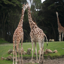

In [6]:
from PIL import Image
import requests
url = 'http://farm1.staticflickr.com/49/137204740_b8b9faa744_z.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image_size = 64
timesteps = 1000

image.resize((image_size,image_size))

In [7]:
def q_sample_loop(schedule_type):
    dm = DDMFunctions.DDMFunctions(timesteps, schedule_type)
    transform = dm.transform_(image_size)
    from matplotlib import pyplot as plt
    import torch
    x_start = transform(image).unsqueeze(0)

    fig, axes = plt.subplots(1, 10, figsize=(6, 4), dpi=200)
    plt.subplots_adjust(wspace=0, hspace=0) 

    i=0
    skip = timesteps // 10
    for t in range(timesteps):
        if t % skip == 0:

            x_noisy = dm.q_sample(x_start, torch.tensor([t]))
            noisy_image = dm.reverse_transform(x_noisy)

            axes[i].imshow(noisy_image)
            axes[i].axis('off')

            i += 1
    plt.show()

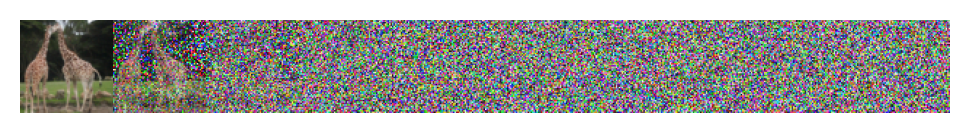

In [ ]:
schedule_type = "linear"
q_sample_loop(schedule_type)

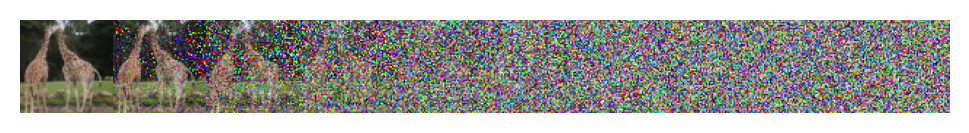

In [9]:
schedule_type = "cosine"
q_sample_loop(schedule_type)

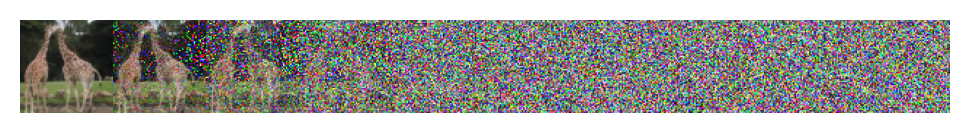

In [10]:
schedule_type = "quadratic"
q_sample_loop(schedule_type)

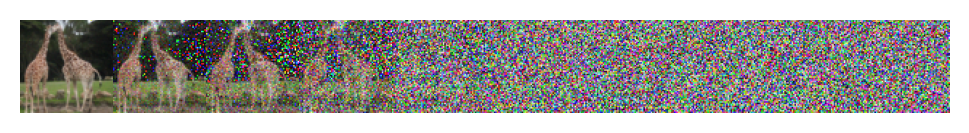

In [12]:
schedule_type = "sigmoid"
q_sample_loop(schedule_type)